In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import timeit

%matplotlib inline

In [6]:
data = np.array([0,1,2,3,4,5]) #would be some arbitrary 1D array

def f1():
    L = np.zeros((m+1,m+1))
    for i in range(2*m, m-1, -1):
        c = 0
        for j in range(i, i-m-1, -1):
            L[2 * m - i, c] = np.sum(data ** j)
            c += 1

        
    

def f2():
    L=[]
    for i in range(2*m, m-1, -1):
        temp = []
        for j in range(i, i-m-1, -1):
            s = 0
            for k in range(len(data)):
                s += np.sum(data[k]**j)
            temp.append(s)
        L.append(temp)

    L = np.array(L)


# Define the setup for timeit
setup = """
import numpy as np
m = 10
data = np.array([0, 1, 2, 3, 4, 5])

def f1():
    L = np.zeros((m+1,m+1))
    for i in range(2*m, m-1, -1):
        c = 0
        for j in range(i, i-m-1, -1):
            L[2 * m - i, c] = np.sum(data ** j)
            c += 1
"""

# Measure the execution time using timeit
execution_time = timeit.timeit("f1()", setup=setup, number=1000)

print("numpy method time is:", execution_time, " seconds")

# Define the setup for timeit
setup = """
import numpy as np
m = 10
data = np.array([0, 1, 2, 3, 4, 5])

def f2():
    L=[]
    for i in range(2*m, m-1, -1):
        temp = []
        for j in range(i, i-m-1, -1):
            s = 0
            for k in range(len(data)):
                s += np.sum(data[k]**j)
            temp.append(s)
        L.append(temp)

    L = np.array(L)
    
"""

# Measure the execution time using timeit
execution_time = timeit.timeit("f2()", setup=setup, number=1000)

print("py method time is:", execution_time, " seconds")

numpy method time is: 0.631481100000002  seconds
py method time is: 3.681344000000024  seconds


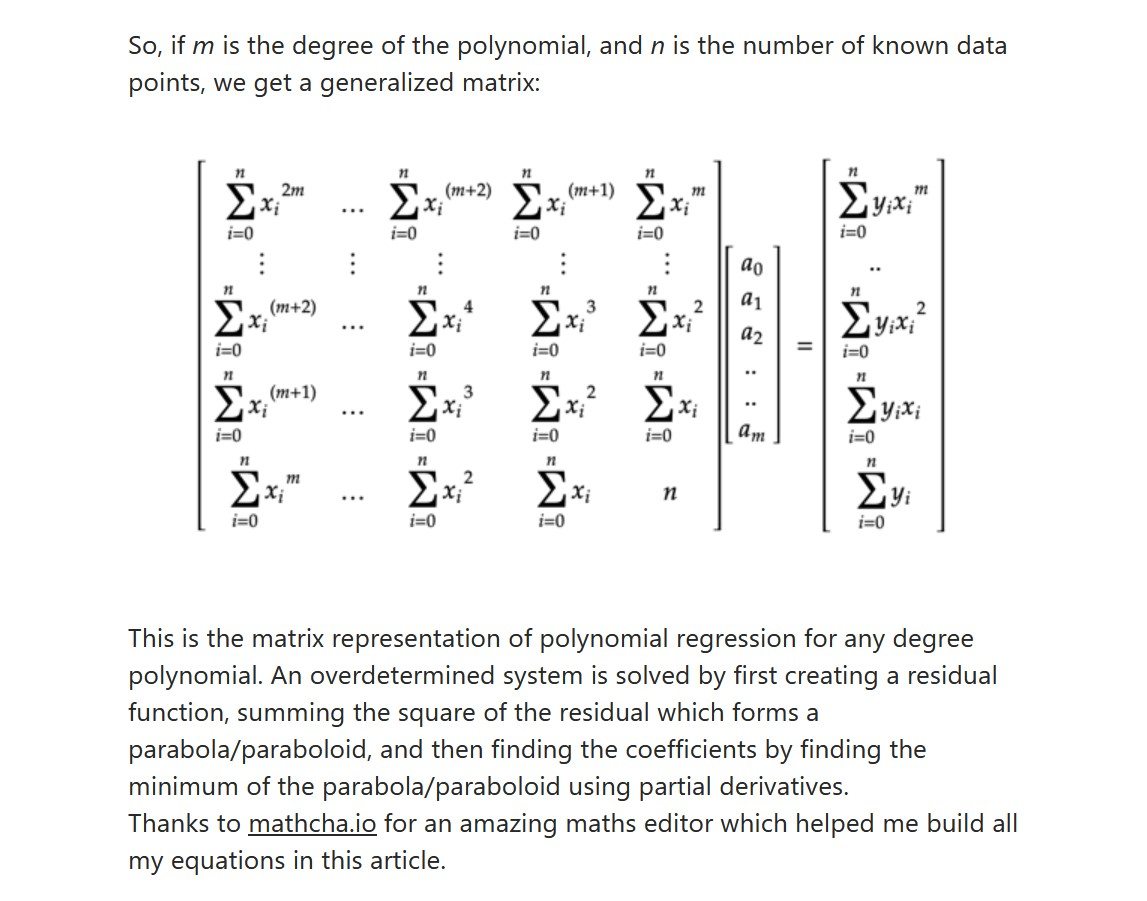
<!-- <div>
<img src="poly_coeff_matrix.jpg" width="600"/>
</div> -->

https://muthu.co/maths-behind-polynomial-regression/ (link for article above)

In [7]:
e = np.zeros((10,1))
e

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [8]:
np.sum(data**13)
y = np.array([1,2,3,4])
y = np.array(y)
y

array([1, 2, 3, 4])

In [17]:
m = 5
def making_A(m, x):
    x = np.array(x)
    data = x
    L = np.zeros((m+1,m+1))
    for i in range(2*m, m-1, -1):
        c = 0
        for j in range(i, i-m-1, -1):
            L[2 * m - i, c] = np.sum(data ** j)
            c += 1
            
    print(L)
    return L

def making_B(m,y,x):
    y = np.array(y)
    x = np.array(x)
    data=x
    L = np.zeros((m+1,1))
    for i in range(m, -1,-1):
        L[m-i] = np.sum(y*(data**i))
    
    return L

# making_Y(10,[1,2,3,4,5],[0,1,2,3,4])

def solve_polyfit(A,B,m):
    coeffs = np.zeros((m,1))
    coeffs = np.linalg.solve(A,B)
    return coeffs

X = np.linspace(0,10,20)
Y = X**2

noise = np.random.randn(*Y.shape)
Y = Y + 10*noise

m = 5
coeffs = solve_polyfit(making_A(m,X),making_B(m,Y,X),m)
coeffs = np.flip(coeffs) # To make the alignment of the coeffs of powers as I want. It is otherwise reversed
for i in coeffs:
    print(type(i), i)

[[2.27098699e+10 2.43937183e+09 2.64613088e+08 2.90565926e+07
  3.24057721e+06 3.68858434e+05]
 [2.43937183e+09 2.64613088e+08 2.90565926e+07 3.24057721e+06
  3.68858434e+05 4.31753900e+04]
 [2.64613088e+08 2.90565926e+07 3.24057721e+06 3.68858434e+05
  4.31753900e+04 5.26315789e+03]
 [2.90565926e+07 3.24057721e+06 3.68858434e+05 4.31753900e+04
  5.26315789e+03 6.84210526e+02]
 [3.24057721e+06 3.68858434e+05 4.31753900e+04 5.26315789e+03
  6.84210526e+02 1.00000000e+02]
 [3.68858434e+05 4.31753900e+04 5.26315789e+03 6.84210526e+02
  1.00000000e+02 2.00000000e+01]]
<class 'numpy.ndarray'> [-0.19995217]
<class 'numpy.ndarray'> [-1.91615435]
<class 'numpy.ndarray'> [2.34036298]
<class 'numpy.ndarray'> [-0.30706609]
<class 'numpy.ndarray'> [0.02130348]
<class 'numpy.ndarray'> [-0.00025685]


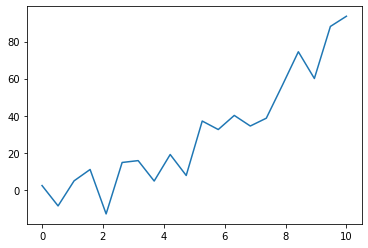

In [18]:
plt.plot(X, Y)

[[-1.99952171e-01]
 [-1.91615435e+00]
 [ 2.34036298e+00]
 [-3.07066089e-01]
 [ 2.13034768e-02]
 [-2.56851236e-04]]


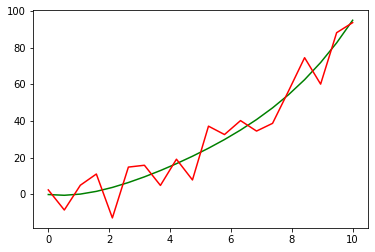

In [19]:
check(coeffs, X, Y)

In [12]:
def check(coeffs, X, Y):
    print(coeffs)
    def PolyCoefficients(x, coeffs):
        o = len(coeffs)
#         print(f'# This is a polynomial of order {o}.')
        y = 0
        for i in range(o):
            y += coeffs[i][0]*x**i
        return y

    e = np.zeros(len(X))
    for i in range(len(X)):
        for j in range(len(coeffs)):
            e[i] += X[i]**j * coeffs[j][0]

    plt.plot(X,PolyCoefficients(X, coeffs), color="green")
    plt.plot(X,Y, label=str(len(coeffs)), color="red")
    plt.show()
    
def rmse(coeffs, X, Y, st):
    Xt = X[st:]
    e = np.zeros(len(Xt))
    for i in range(len(Xt)):
        for j in range(len(coeffs)):
            e[i] += Xt[i]**j * coeffs[j]
            
    test = np.array(Y[st:])
    err = test - e
    rmserr = ((np.sum(err)/len(err))**2)**(1/2)
    return rmserr

In [ ]:
# Next goal: make a function that makes a regression model for every single value of m, and print all the graphs + rmse 
# values.
